Faccio un po' di prove con i nuovi metodi di clustering sui punti delle rette che intersecano l'EPG, sempre sul caso particolare della solita funzione h1,h2 utilizzata nel report. Comincio per intersezioni con rette del tipo 1. 

Dati di partenza: 

-numero di rete = 20

-EPS (quanto "grosse" sono le rette) = 0.2 (dopo ripeto le prove per EPS = 0.1)

-tolleranza iniziale per il calcolo dei punti pareto-critici = 0.7

8097


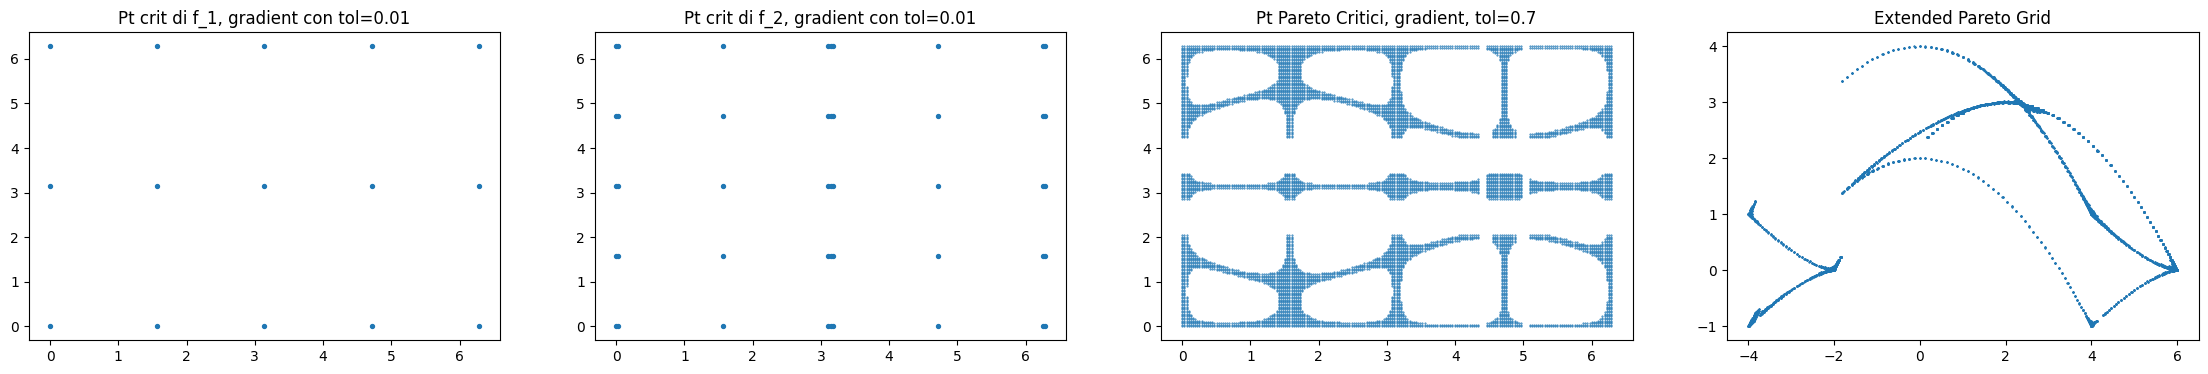

In [1]:
#Voglio vedere se funziona il clustering con le rette di tipo 1,2
from ourPolynomial import *
from ProgrammaEPG import *
from Rette import *

#Esempio grado 3

h1 = parse("2cos^2(x) + 4cos(y)")
h2 = parse("sen^3(x) + 3sen^2(y)")

tol = 0.7

h1ppc,h2ppc = EPG(h1,h2,200,0.01,tol)
print(len(h1ppc))

In [2]:
t1rette = intersect_sheaf_type1(h1ppc,h2ppc)
#Se vuoi vedere un'immagini sotto questo e non la vedi vai a rette.py e fai PLOT = True

In [3]:
t1clusters = sheaf_of_clusters(t1rette)
#Questo è per contare cluster/punti per cluster
for cl_line in t1clusters:
    i=0
    print("Cluster " + str(i))
    i+=1
    for cl in cl_line:
        print(len(cl))


Cluster 0
4
4
4
Cluster 0
23
4
7
15
11
4
2
Cluster 0
8
4
Cluster 0
4
4
Cluster 0
4
2
Cluster 0
4
4
Cluster 0
4
6
Cluster 0
4
Cluster 0
4
6
Cluster 0
4
8
Cluster 0
4
8
Cluster 0
4
6
Cluster 0
4
6
Cluster 0
2
68
10
Cluster 0
92
32
26
14
12
69
24
60
10
Cluster 0
80
30
42
6
Cluster 0
43
14
32
4
Cluster 0
38
5
20
Cluster 0
40
10
6
6
6
8
Cluster 0
65
10
10
22
12
Cluster 0
243
6
10
12
26
12
Cluster 0
7
48
14
Cluster 0
53
12
Cluster 0
6
39
16
Cluster 0
6
38
19
Cluster 0
6
40
36
Cluster 0
6
13
28
Cluster 0
6
21
28
Cluster 0
34
3
36
Cluster 0
30
10
46
Cluster 0
58
30
Cluster 0
15
6
52
Cluster 0
6
11
54
Cluster 0
6
10
43
Cluster 0
6
12
24
Cluster 0
7
16
Cluster 0
12
13
Cluster 0
10
14
Cluster 0
6
4
2
Cluster 0
6
8
Cluster 0
9
Cluster 0
10
10
Cluster 0
3
16
5
Cluster 0
6
12
10
Cluster 0
6
12
Cluster 0
12
Cluster 0
8
10
Cluster 0
6
12
8
Cluster 0
3
14
4
Cluster 0
6
12
Cluster 0
6
Cluster 0
20
8
Cluster 0
21
6
Cluster 0
6
29
6
6
Cluster 0
6
40
Cluster 0
6
16
Cluster 0
6
20
6
Cluster 0
6
12
6
Cluster

Sempre con i valori di prima, provando esperimentalmente diversi valore per CLUST_EPS (più grande è, più vicini sono i punti appartenenti allo stesso cluster) ho ottenuto i seguenti dati: 

    - Per CLUST_EPS >= 0.5 in ogni retta ottengo 1-3 cluster, che sono troppo pochi.

    - Per CLUST_EPS = 0.2 in ogni retta ottengo 2-6 cluster. In ogni cluster ci sono 12-215 punti.

    - Per CLUST_EPS = 0.1 in ogni retta ottengo 2-14 cluster. In ogni cluster ci sono 4-215 punti.
    
    - Per CLUST_EPS = 0.05 in ogni retta ottengo 3-20 cluster. In ogni cluster ci sono 2-211 punti.

Ripeto queste prove con le rette meno grosse (passo da EPS = 0.2 a EPS = 0.1). Secondo me conviene ricalcolare soltanto i cluster che siamo molti sicuri che rappresentano noise, quindi sarà meglio che l'intersezione con le rette sia più o meno precisa.

    - Per CLUST_EPS >= 0.5 in ogni retta ottengo 1-3 cluster, che sono troppo pochi.

    - Per CLUST_EPS = 0.2 in ogni retta ottengo 2-4 cluster. In ogni cluster ci sono 5-139 punti.

    - Per CLUST_EPS = 0.1 in ogni retta ottengo 2-7 cluster. In ogni cluster ci sono 3-93 punti.
    
    - Per CLUST_EPS = 0.05 in ogni retta ottengo 2-9 cluster. In ogni cluster ci sono 1-93 punti.

Come avrebbe senso pensare, trovo meno cluster e più piccoli, che secondo me ci sta.

Attenzione: sicuramente tutti questi numeri dipendono dalle funzioni di partenza, dall'EPS delle rette e dalla tolleranza iniziale per il calcolo dei punti pareto-critici, quindi è difficile fissare un valore ideale per tutte le prove. Idealmente l'utente potrà fare diverse prove specificando tutti questi parametri e comparare i risultati.


In [4]:
#Proviamo a ricalcolare un cluster specifico. Scelgo a proposito uno grosso dalle prove già fatte
#bello_grosso = t1clusters[10][1]
#print(len(bello_grosso))    #Questo cluster ha 93 punti.

#diff, i = recalculate_cluster(bello_grosso,h1,h2,h1ppc,h2ppc,tol)
#print(len(diff))
#print("Ha fatto " + str(i) + " iterazioni.")

8097
Ho ridotto 10 clusters.


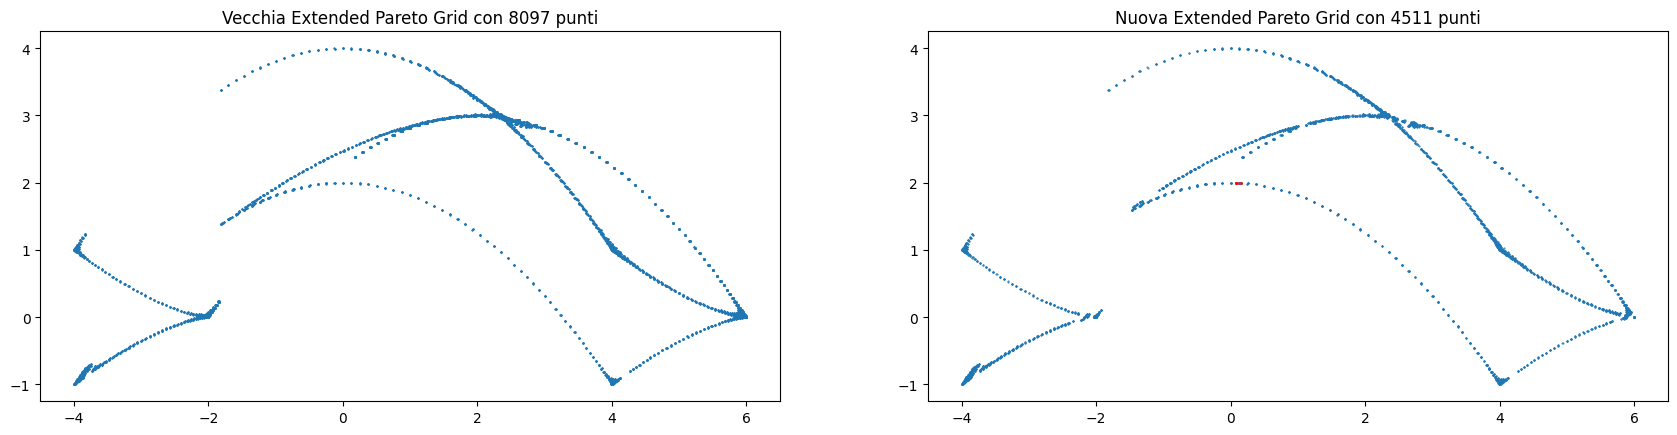

In [5]:
h1ppc,h2ppc,nclusters = manage_clusters(t1clusters,h1,h2,h1ppc,h2ppc,tol)
print(len(h1ppc))
print("Ho ridotto " + str(nclusters) + " clusters.")

Adesso provo il secondo tipo di fascio di rette. Lui trova dei punti (quelli in rosso) palesemente sbagliati.

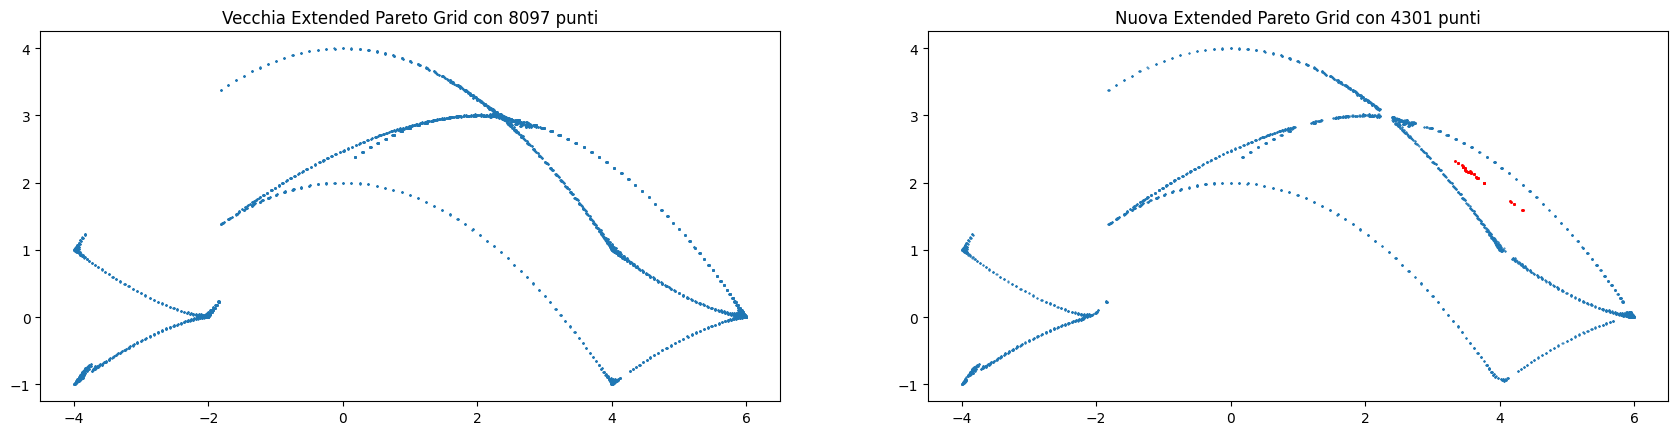

In [6]:
t2rette = intersect_sheaf_type2(h1ppc,h2ppc)
t2clusters = sheaf_of_clusters(t2rette)
h1ppc,h2ppc,nclusters = manage_clusters(t2clusters,h1,h2,h1ppc,h2ppc,tol)

Nell'esempio precedente sembra che il metodo di clustering tolga tutti i punti, quelli di rumore e quelli significativi. Cambio esempio e metto una tolleranza oscena in modo di avere tanto rumore.

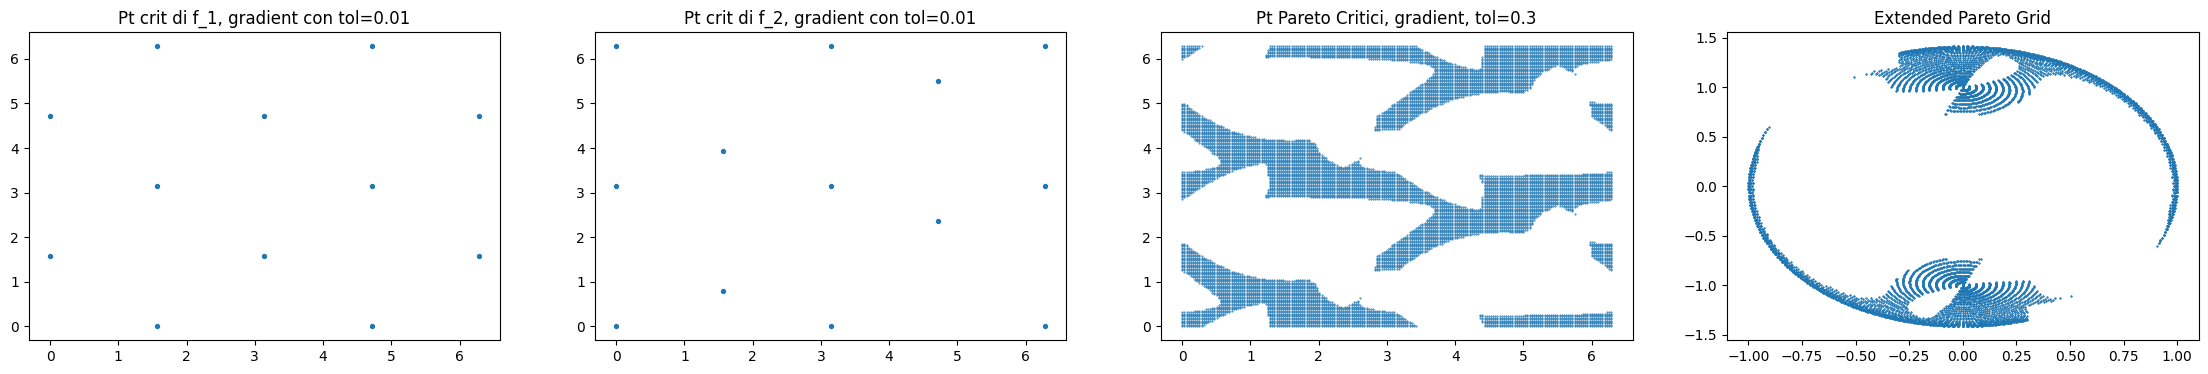

In [10]:
g1 = parse("cosxseny")
g2 = parse("senxseny + cosy")

g1ppc,g2ppc = EPG(g1,g2,200,0.01,0.3)

12703
Ho ridotto 74 clusters.


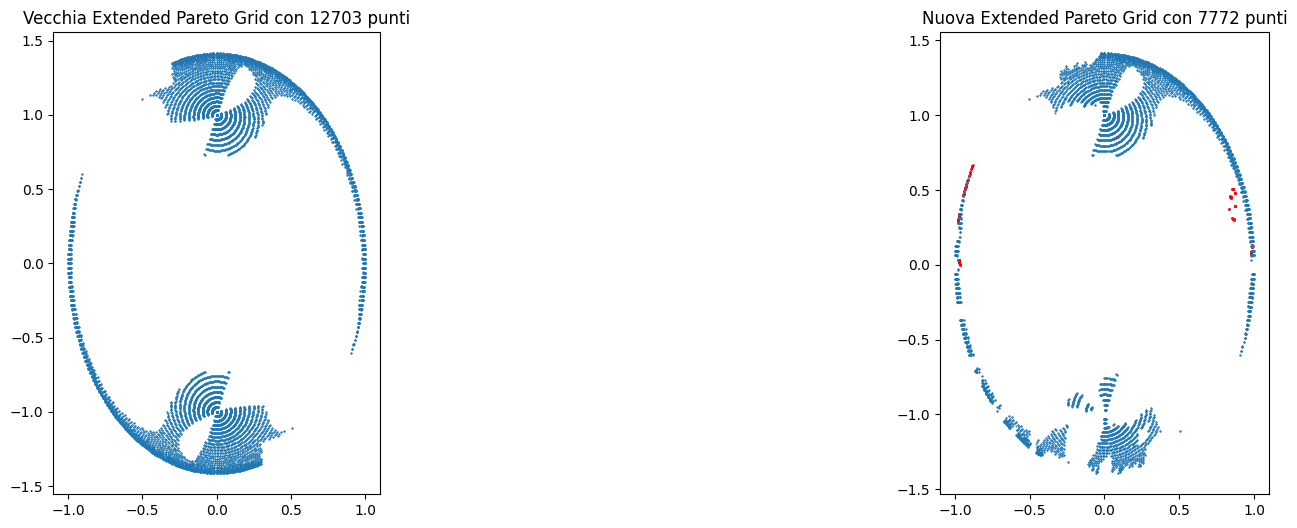

In [11]:
#Fascio di rette tipo 1
t1rette = intersect_sheaf_type1(g1ppc,g2ppc)
t1clusters = sheaf_of_clusters(t1rette)
g1ppc,g2ppc,nclusters = manage_clusters(t1clusters,g1,g2,g1ppc,g2ppc,tol)
print(len(g1ppc))
print("Ho ridotto " + str(nclusters) + " clusters.")

In [9]:
#Fascio di rette tipo 2
#t2rette = intersect_sheaf_type2(g1ppc,g2ppc)
#t2clusters = sheaf_of_clusters(t2rette)
#g1ppc,g2ppc,nclusters = manage_clusters(t2clusters,g1,g2,g1ppc,g2ppc,tol)
#print(len(g1ppc))
#print("Ho ridotto " + str(nclusters) + " clusters.")